In [1]:
import matplotlib.pyplot as plt
from IPython.core.display import Math, Markdown
import numpy as np
import sympy
import pandas as pd
from scipy import interpolate
from Splines.CubicSplines import cubic_spline_functions, spline_to_latex, evaluate_spline
from pathlib import Path
pd.set_option('future.no_silent_downcasting', False)
import warnings
warnings.filterwarnings('ignore')

current_dir = Path().cwd()
fig_dir= current_dir / "Assignment6_latex" / "figures"

# 17.5
Given Data
| x | 1 | 2 |  3 |  5 | 6 |
|---|---|-----|-----|-----|-----|
| f(x) |4.75| 4 | 5.25 | 19.75 | 36 |

Calculate $f(4)$ using Newton’s interpolating polynomials of
order 1 through 4. Choose your base points to attain good
accuracy. That is, the points should be centered around and
as close as possible to the unknown. What do your results
indicate regarding the order of the polynomial used to gener-
ate the data in the table?

In [2]:
from Interpolation.NetwtonInterpolation import newton_interpolation_polynomial

p_17_5_data = dict(
    x=np.array([1,2,3,5,6]),
    y=np.array([4.75, 4 , 5.25 , 19.75 , 36 ]),
)
p_17_5_sol = pd.DataFrame(columns=['method', 'order', 'f(x)' ,'f(4)'])
for order in range(1,5):
    print(f'Newton interpolation polynomial order {order}:')
    fx = newton_interpolation_polynomial(p_17_5_data['x'], p_17_5_data['y'], order=order)
    p_17_5_sol.loc[order, 'f(x)'] = fx
    p_17_5_sol.loc[order, 'method'] = 'Newton'
    p_17_5_sol.loc[order, 'order'] = order
    p_17_5_sol.loc[order, 'f(4)'] = fx.subs({'x': 4})
    display(Math(f'f(x)={sympy.latex(fx)}'))
    display(Math(f'f(4) = {fx.subs({'x':4})}'))

Newton interpolation polynomial order 1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 2:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 3:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Newton interpolation polynomial order 4:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
display(Markdown(p_17_5_sol.to_markdown()))

|    | method   |   order | f(x)                               |   f(4) |
|---:|:---------|--------:|:-----------------------------------|-------:|
|  1 | Newton   |       1 | 4.75000000000000                   |   4.75 |
|  2 | Newton   |       2 | 5.5 - 0.75*x                       |   2.5  |
|  3 | Newton   |       3 | 1.0*x**2 - 3.75*x + 7.5            |   8.5  |
|  4 | Newton   |       4 | 0.25*x**3 - 0.5*x**2 - 1.0*x + 6.0 |  10    |

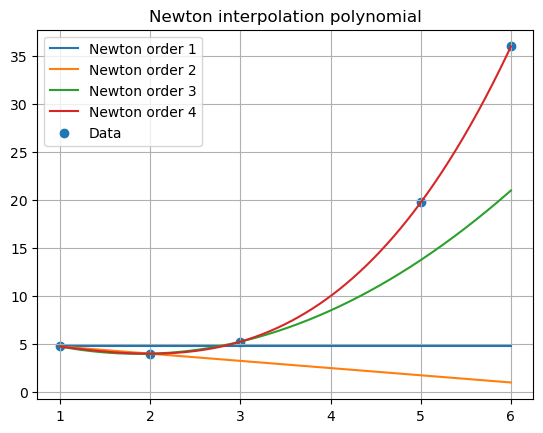

In [4]:
p17_5_x = np.linspace(p_17_5_data['x'].min(), p_17_5_data['x'].max(), 1000)
for i, row in p_17_5_sol.iterrows():
    fx = row['f(x)']
    p17_5_y = np.array([fx.subs({'x':x}) for x in p17_5_x])
    label = f"{row['method']} order {row['order']}"
    plt.plot(p17_5_x, p17_5_y, label=label)

plt.scatter(p_17_5_data['x'], p_17_5_data['y'], label='Data')
plt.grid()
plt.legend()
plt.title('Newton interpolation polynomial')
plt.savefig(fig_dir / "Newton_interpolation.png")
plt.show()

# 17.6
Repeat Prob. 17.5 using the Lagrange polynomial of
order 1 through 3.

In [5]:
from Interpolation.LagrangeInterpolation import lagrange_interpolation_polynomial

k=len(p_17_5_sol)+1
for order in range(1,5):
    fx = lagrange_interpolation_polynomial(p_17_5_data['x'][:order], p_17_5_data['y'][:order])
    display(Math(f'f(x)={sympy.latex(fx)}'))
    display(Math(f'f(4)={fx.subs({'x':4})}'))
    k = len(p_17_5_sol)+1
    p_17_5_sol.loc[k+order, 'f(x)'] = fx
    p_17_5_sol.loc[k+order, 'method'] = 'Lagrange'
    p_17_5_sol.loc[k+order, 'order'] = order
    p_17_5_sol.loc[k+order, 'f(4)'] = fx.subs({'x': 4})
display(Markdown(p_17_5_sol.to_markdown()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|    | method   |   order | f(x)                               |   f(4) |
|---:|:---------|--------:|:-----------------------------------|-------:|
|  1 | Newton   |       1 | 4.75000000000000                   |   4.75 |
|  2 | Newton   |       2 | 5.5 - 0.75*x                       |   2.5  |
|  3 | Newton   |       3 | 1.0*x**2 - 3.75*x + 7.5            |   8.5  |
|  4 | Newton   |       4 | 0.25*x**3 - 0.5*x**2 - 1.0*x + 6.0 |  10    |
|  6 | Lagrange |       1 | 4.75000000000000                   |   4.75 |
|  8 | Lagrange |       2 | 5.5 - 0.75*x                       |   2.5  |
| 10 | Lagrange |       3 | 1.0*x**2 - 3.75*x + 7.5            |   8.5  |
| 12 | Lagrange |       4 | 0.25*x**3 - 0.5*x**2 - 1.0*x + 6.0 |  10    |

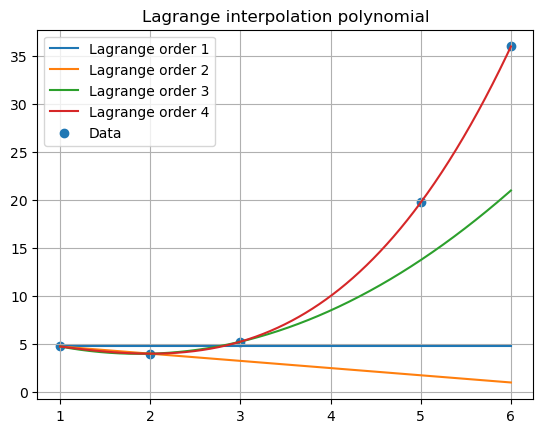

In [6]:
p17_6_x = np.linspace(p_17_5_data['x'].min(), p_17_5_data['x'].max(), 1000)
p_17_6_sol = p_17_5_sol[p_17_5_sol['method'].str.contains('Lagrange')]
for i, row in p_17_6_sol.iterrows():
    fx = row['f(x)']
    p17_6_y = np.array([fx.subs({'x':x}) for x in p17_6_x])
    label = f"{row['method']} order {row['order']}"
    plt.plot(p17_6_x, p17_6_y, label=label)

plt.scatter(p_17_5_data['x'], p_17_5_data['y'], label='Data')
plt.grid()
plt.legend()
plt.title('Lagrange interpolation polynomial')
plt.savefig(fig_dir / "Lagrange_interpolation.png")
plt.show()

# 18.1
Given Data
| x | 1 | 2 | 2.5 | 3 | 4 | 5 |
|---|---|-----|-----|-----|-----|-----|
| f(x) |1| 5 | 7 | 8 | 2 | 1 |

Fit these data with
(a) a cubic spline with natural end conditions,
(b) a cubic spline with not-a-knot end conditions, and
(c) piecewise cubic Hermite interpolation.

In [7]:
p_18_1_data = dict(
    x=np.array([1 ,2 , 2.5 , 3 , 4 , 5 ]),
    y=np.array([1, 5 , 7 , 8 , 2 , 1]),
)


In [8]:
p_18_1_a_spline = cubic_spline_functions(p_18_1_data['x'], p_18_1_data['y'], end_condition='natural')
display(Markdown('P 18.1.a Cubic Spline with Natual End condition'))
display(Math(spline_to_latex(p_18_1_a_spline)))

P 18.1.a Cubic Spline with Natual End condition

<IPython.core.display.Math object>

In [9]:
p_18_1_b_spline = cubic_spline_functions(p_18_1_data['x'], p_18_1_data['y'], end_condition='not-a-knot')
display(Markdown('P 18.1.a Cubic Spline with Not-a-knot End condition'))
display(Math(spline_to_latex(p_18_1_b_spline)))

P 18.1.a Cubic Spline with Not-a-knot End condition

<IPython.core.display.Math object>

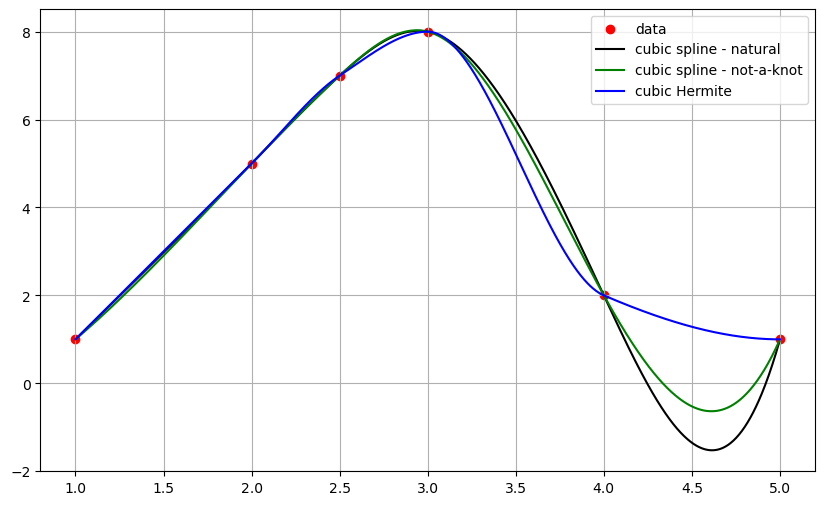

In [10]:
# plot
p_18_1_x = np.linspace(p_18_1_data['x'].min(), p_18_1_data['x'].max(), 1000)
p_18_1_a_y = evaluate_spline(p_18_1_a_spline, p_18_1_x)
p_18_1_b_y = evaluate_spline(p_18_1_b_spline, p_18_1_x)
p_18_1_c_y = interpolate.PchipInterpolator(p_18_1_data['x'], p_18_1_data['y'])(p_18_1_x)

plt.figure(figsize=(10, 6))
plt.scatter(p_18_1_data['x'], p_18_1_data['y'], color='red', label='data')
plt.plot(p_18_1_x, p_18_1_a_y, color='black', label='cubic spline - natural')
plt.plot(p_18_1_x, p_18_1_b_y, color='green', label='cubic spline - not-a-knot')
plt.plot(p_18_1_x, p_18_1_c_y, color='blue', label='cubic Hermite')

plt.grid(True)
plt.legend()
plt.savefig(fig_dir / "p_18_1_Cubic_interpolation.png")
plt.show()

# 18.3

18.3 The following is the built-in humps function that MATLAB
uses to demonstrate some of its numerical capabilities:

$$ f(x) = \frac{1}{(x-0.3)^2+0.01} + \frac{1}{(x-0.9)^2+0.04} - 6$$

The humps function exhibits both flat and steep regions over a
relatively short x range. Here are some values that have been
generated at intervals of 0.1 over the range from x = 0 to 1:


| x | 0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1 |
|---|---|-----|-----|-----|-----|-----|-----|-----|-----|-----|---|
| f(x) | 5.176 | 15.471 | 45.887 | 96.500 | 47.448 | 19.000 | 11.692 | 12.382 | 17.846 | 21.703 | 16.000 |

Fit these data with a
 - cubic spline with not-a-knot end
conditions
  - piecewise cubic Hermite interpolation.


In both cases, create a plot comparing the fit with the exact humps function.

In [11]:
p_18_3_data = dict(
    x=np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
    y=np.array([5.176 , 15.471 , 45.887 , 96.500 , 47.448 , 19.000 , 11.692 , 12.382 , 17.846 , 21.703 , 16.000 ])
)

In [12]:
p_18_3_a_spline = cubic_spline_functions(p_18_3_data['x'], p_18_3_data['y'], end_condition='not-a-knot')
display(Math(spline_to_latex(p_18_3_a_spline)))

<IPython.core.display.Math object>

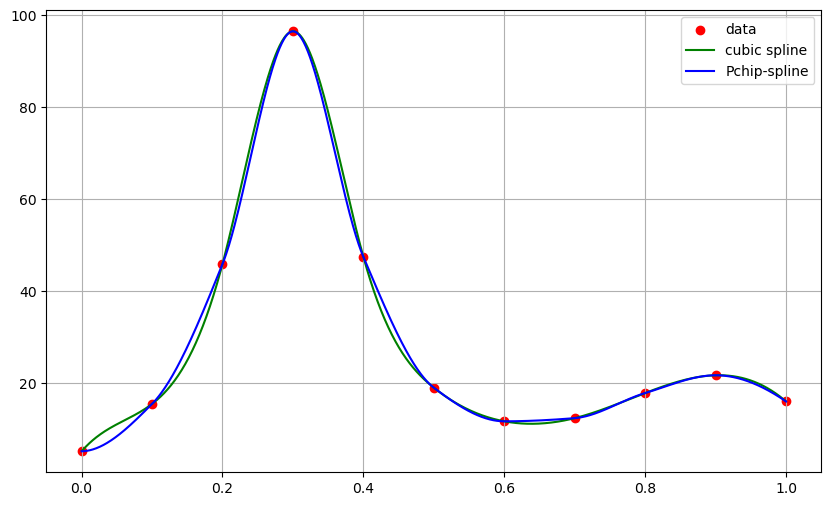

In [13]:
p_18_3_x = np.linspace(p_18_3_data['x'].min(), p_18_3_data['x'].max(), 1000)
p_18_3_a_y = evaluate_spline(p_18_3_a_spline, p_18_3_x)
p_18_3_b_y = interpolate.PchipInterpolator(p_18_3_data['x'], p_18_3_data['y'])(p_18_3_x)

plt.figure(figsize=(10, 6))
plt.scatter(p_18_3_data['x'], p_18_3_data['y'], color='red' , label='data')
plt.plot(p_18_3_x, p_18_3_a_y, color='green', label='cubic spline')
plt.plot(p_18_3_x, p_18_3_b_y, color='blue' , label='Pchip-spline')
plt.legend()
plt.grid()
plt.savefig(fig_dir / "p_18_3_Cubic_interpolation.png")
plt.show()